#  Business Case: Yulu - Hypothesis Testing

### About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

#### Column description 

1. datetime: datetime
2. season: season (1: spring, 2: summer, 3: fall, 4: winter)
3. holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
4. workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
5. weather:
- Clear, Few clouds, partly cloudy, partly cloudy
- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
6. temp: temperature in Celsius
7. atemp: feeling temperature in Celsius
8. humidity: humidity
9. windspeed: wind speed
10. casual: count of casual users
11. registered: count of registered users
12. count: count of total rental bikes including both casual and registered

How you can help here?

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands


1. Define Problem Statement and perform Exploratory Data Analysis (10 points)
2. Definition of problem (as per given problem statement with additional views)
3. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
4. Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
5. Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
6. Illustrate the insights based on EDA
7. Comments on range of attributes, outliers of various attributes
8. Comments on the distribution of the variables and relationship between them
9. Comments for each univariate and bivariate plots

10. 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented (10 points)
11. ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)
12. Chi-square test to check if Weather is dependent on the season (10 points)

- Notebook Quality (10 points):

1. Structure & Flow
2. Well commented code

- What good looks like (distribution of 10 points):

1. Visual analysis (1)
2. Hypothesis formulation (1)
3. Select the appropriate test (1)
4. Check test assumptions (2)

Find the p-value(1)

Conclusion based on the p-value (2)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, levene, shapiro, kstest, boxcox, kruskal
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_csv('yulu_bike.csv')
df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6068,2012-02-09 02:00:00,1,0,1,1,9.02,11.365,80,8.9981,0,2,2
8699,2012-08-04 20:00:00,3,0,0,1,33.62,38.635,52,19.9995,117,195,312
4840,2011-11-14 18:00:00,4,0,1,1,22.96,26.515,56,19.0012,29,460,489
5932,2012-02-03 09:00:00,1,0,1,1,9.84,11.365,65,12.9980,18,252,270
9003,2012-08-17 12:00:00,3,0,1,1,33.62,12.120,41,15.0013,110,255,365
4000,2011-09-17 17:00:00,3,0,0,1,21.32,25.000,72,15.0013,141,218,359
1299,2011-03-19 00:00:00,1,0,0,2,24.60,31.060,53,16.9979,26,50,76
1961,2011-05-08 15:00:00,2,0,0,1,24.60,31.060,49,0.0000,128,230,358
1749,2011-04-18 19:00:00,2,0,1,1,22.96,26.515,46,16.9979,42,244,286
3494,2011-08-15 12:00:00,3,0,1,1,30.34,34.090,58,19.0012,62,116,178


In [3]:
df.shape

(10886, 12)

In [4]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [9]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [10]:
df['day'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month

<Axes: xlabel='datetime', ylabel='count'>

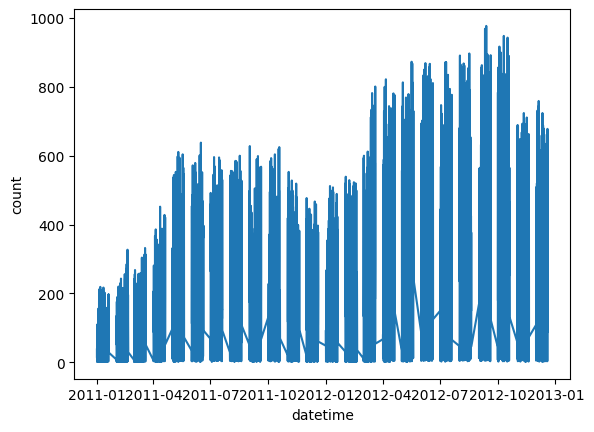

In [11]:
sns.lineplot(data=df, x='datetime', y='count')

In [ ]:
df.sample(10)

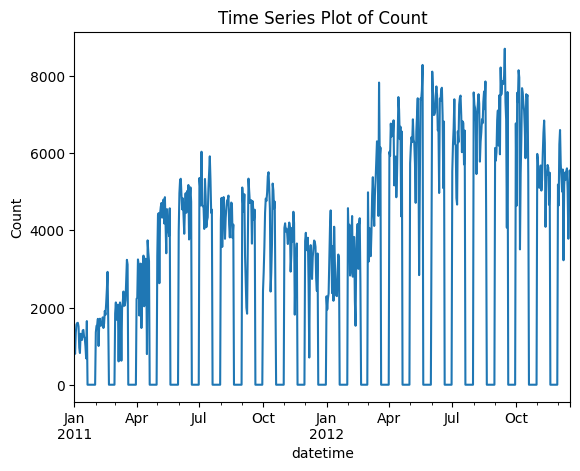

In [13]:
# Assuming your column name is 'datetime' or another variant
df['datetime'] = pd.to_datetime(df['datetime'])  # Correcting column name case
df.set_index('datetime', inplace=True)  # Setting 'datetime' as the index for time series analysis

# Plot example
df.resample('D').sum()['count'].plot()
plt.title('Time Series Plot of Count')
plt.ylabel('Count')
plt.show()


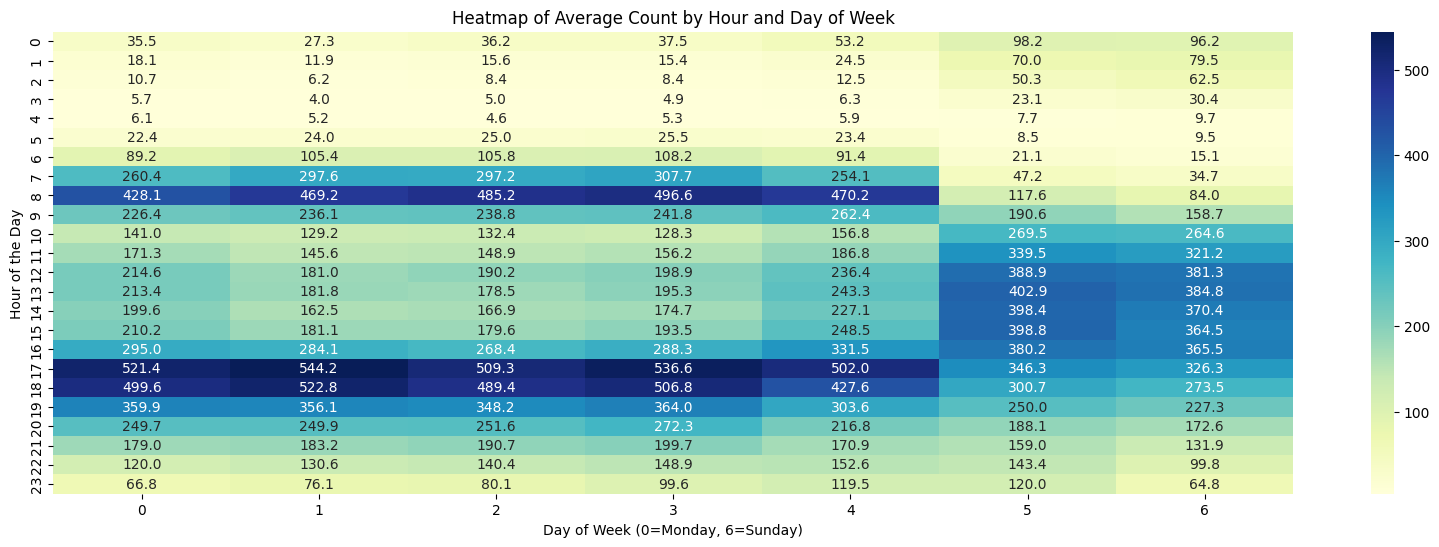

In [16]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
pivot = df.pivot_table(index='hour', columns='dayofweek', values='count', aggfunc='mean')


plt.figure(figsize=(20, 6))  # Increase the size of the figure
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".1f")  # Add annotations to see values
plt.title('Heatmap of Average Count by Hour and Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Hour of the Day')
plt.show()


In [22]:
df[df['holiday']==1]['count'].mean(), df[df['holiday']==0]['count'].mean()

(185.87781350482314, 191.7416548463357)

In [23]:
df[df['holiday']==1]['count'].sum(), df[df['holiday']==0]['count'].sum()

(57808, 2027668)

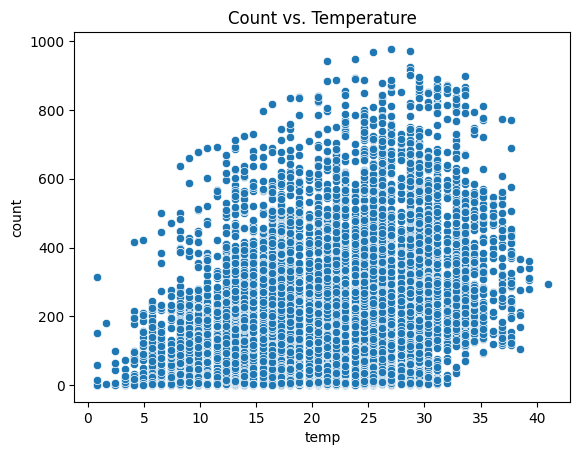

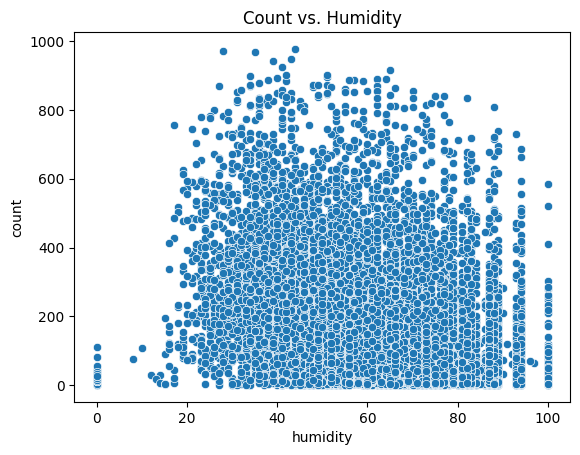

In [25]:
sns.scatterplot(x='temp', y='count', data=df)
plt.title('Count vs. Temperature')
plt.show()

sns.scatterplot(x='humidity', y='count', data=df)
plt.title('Count vs. Humidity')
plt.show()

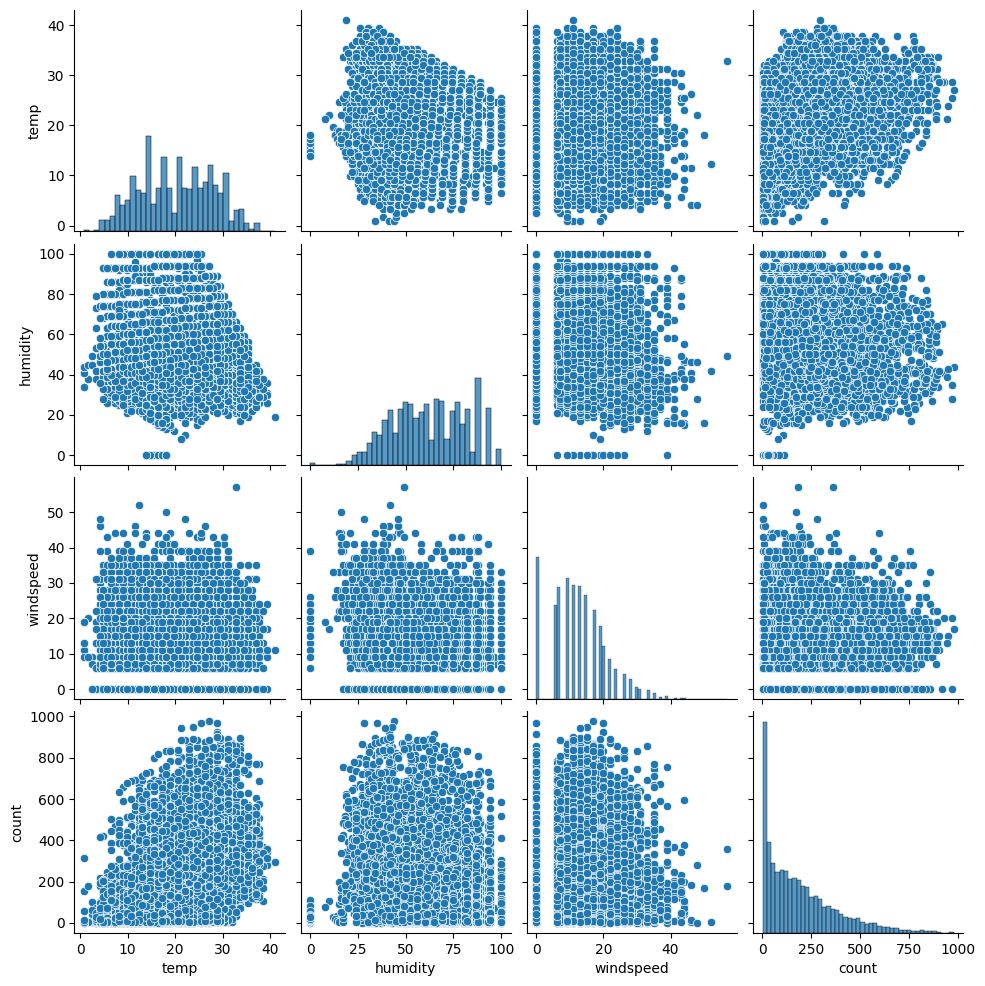

In [26]:
sns.pairplot(df[['temp', 'humidity', 'windspeed', 'count']])
plt.show()


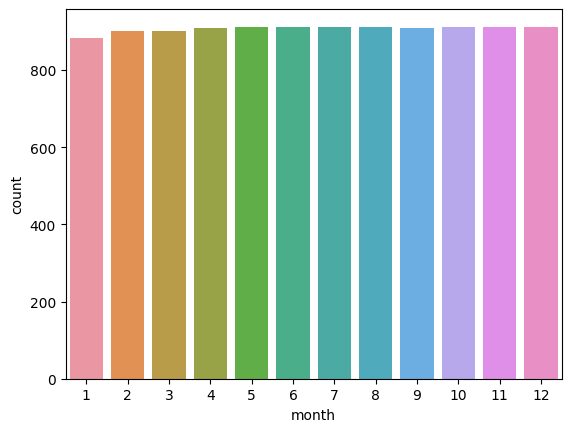

In [31]:
sns.countplot(data=df, x='month')
plt.show()

<Axes: xlabel='count', ylabel='Count'>

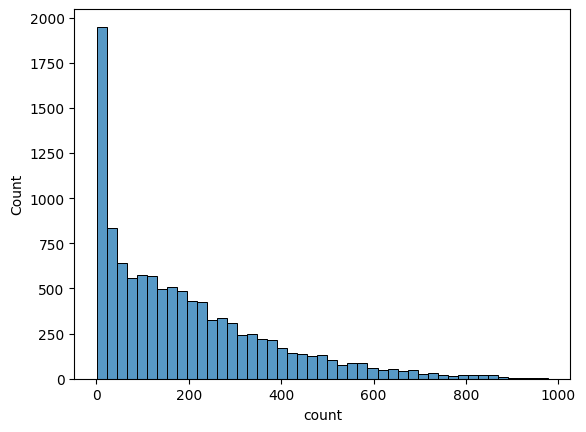

In [33]:
sns.histplot(data=df, x='count')

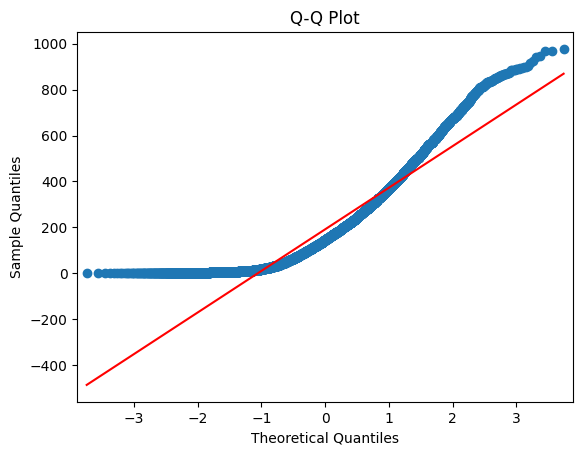

In [34]:
qqplot(data = df['count'], line='s')
plt.title("Q-Q Plot")
plt.show()

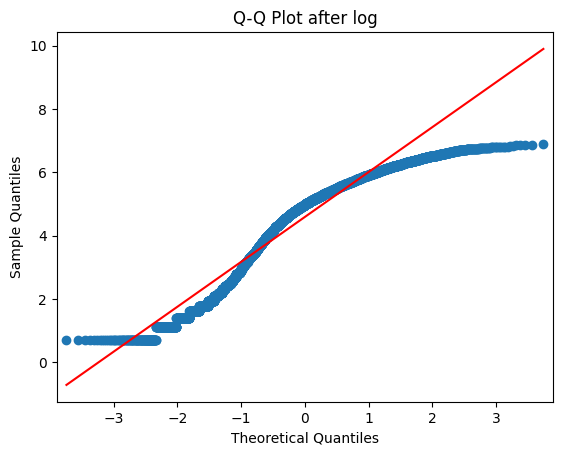

In [35]:
df['log_count'] = np.log(df['count']+1)

qqplot(data = df['log_count'], line='s')
plt.title("Q-Q Plot after log")
plt.show()

Best Lambda: 0.3156702357923426


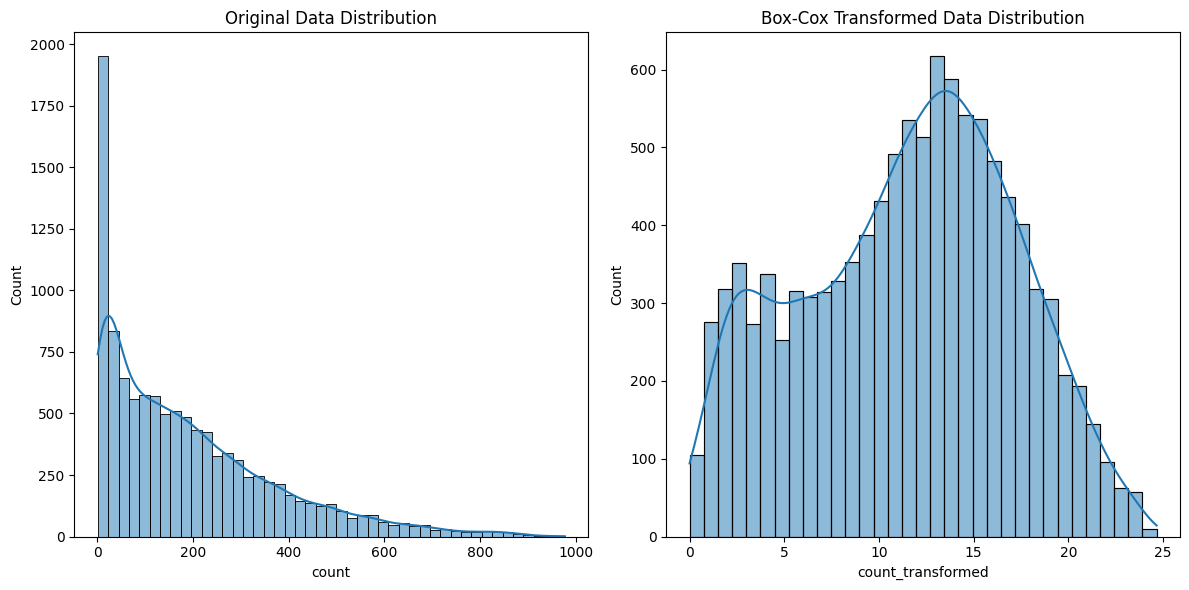

In [37]:
# Assuming 'count' is your column to be transformed and it's strictly positive
df['count_transformed'], best_lambda = boxcox(df['count'])  # Apply Box-Cox transformation
print(f"Best Lambda: {best_lambda}")  # Lambda parameter used in the transformation

# Plot original data distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['count'], kde=True)
plt.title('Original Data Distribution')

# Plot transformed data distribution
plt.subplot(1, 2, 2)
sns.histplot(df['count_transformed'], kde=True)
plt.title('Box-Cox Transformed Data Distribution')

plt.tight_layout()
plt.show()


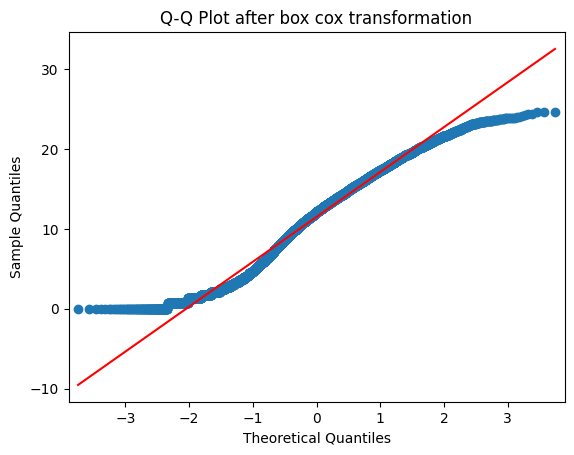

In [38]:
qqplot(data = df['count_transformed'], line='s')
plt.title("Q-Q Plot after box cox transformation")
plt.show()

In [ ]:
sns.histplot(data=df['log_count'])


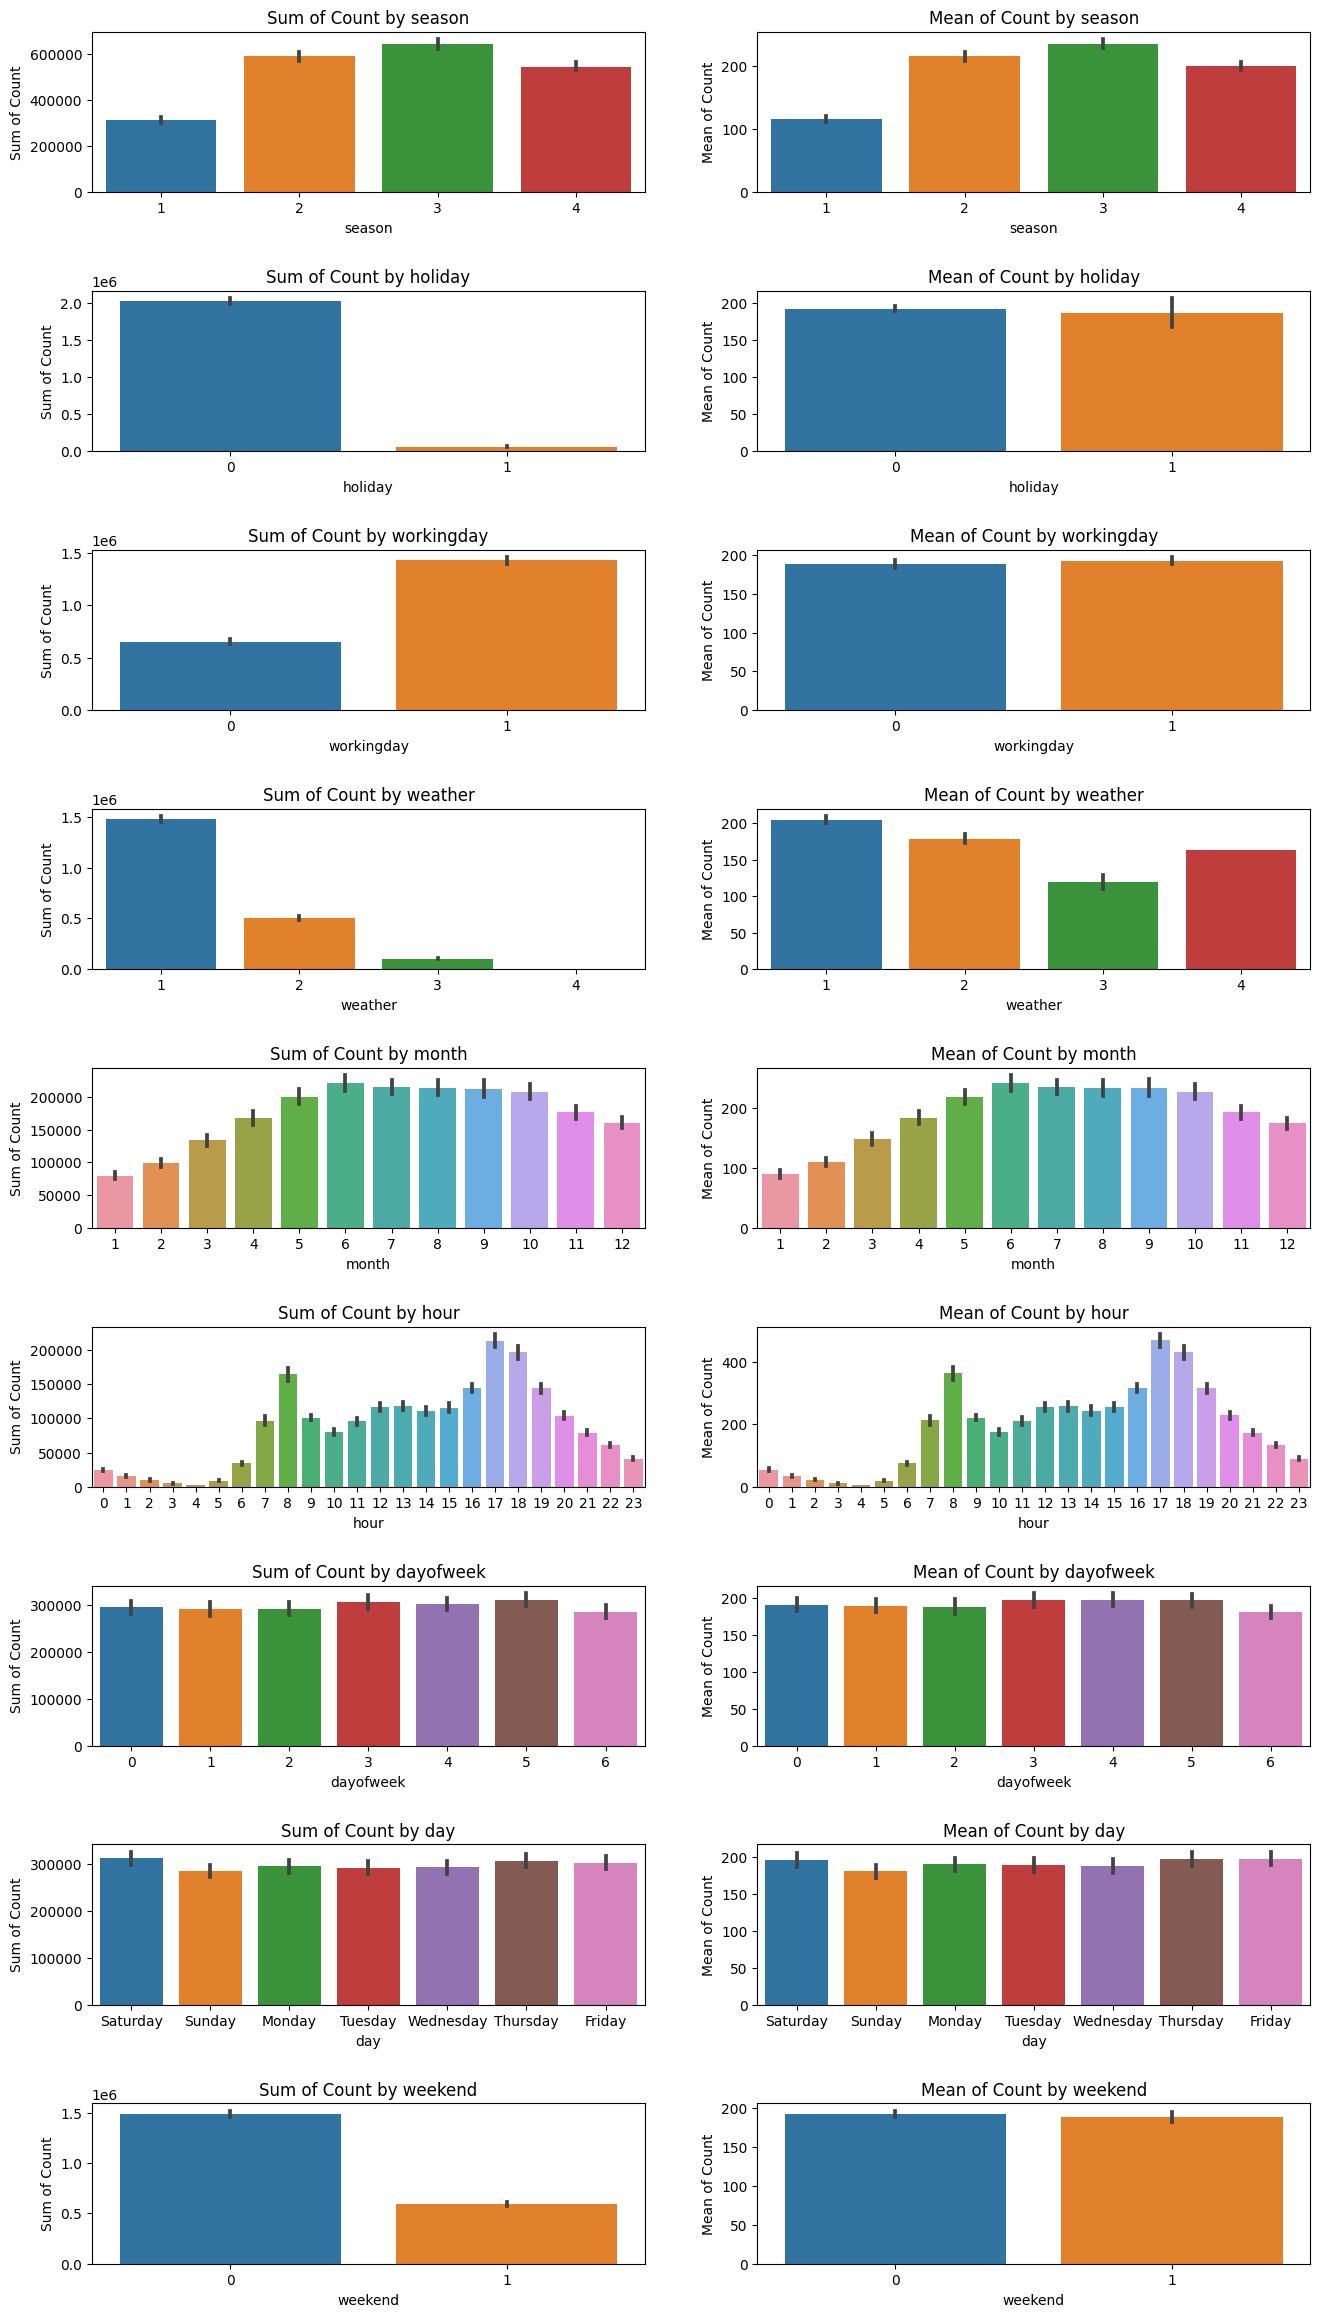

In [60]:
# Define the categorical columns
cat_col = ['season', 'holiday', 'workingday', 'weather', 'month', 'hour', 'dayofweek', 'day', 'weekend']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(14, 24))  # Adjust figsize as needed
fig.tight_layout(pad=5.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the sum and mean for each categorical column
for idx, col in enumerate(cat_col):
    # Plot the sum
    sns.barplot(x=col, y='count', data=df, estimator='sum', ax=axes[2*idx])
    axes[2*idx].set_title(f'Sum of Count by {col}')
    axes[2*idx].set_xlabel(col)
    axes[2*idx].set_ylabel('Sum of Count')

    # Plot the mean
    sns.barplot(x=col, y='count', data=df, estimator='mean', ax=axes[2*idx + 1])
    axes[2*idx + 1].set_title(f'Mean of Count by {col}')
    axes[2*idx + 1].set_xlabel(col)
    axes[2*idx + 1].set_ylabel('Mean of Count')

# Show the plot
plt.show()


## Before performing any test lets check variance and normality for different classes distribution.

#### Variance test (Levene test)

### Performing Shapiro test for normality to check if data is normally distributed among different classes. 

#### Since the data distribution is not normally distribution, therefore non-parametric hypothesis testing will be more powerful. However, we will perform both parametric and non-parametric testing.

### Performing Anova test for multi-category variables quarter and weather with target variable count.

- Null hypothesis: There is no significant difference between mean of the no of yulu bike ride on different quarters. 
- Alternative hypothesis: There is a significant difference between mean of the no of yulu bike ride on different quarters.

- Since there is more than two classes here i.e. quarter 1,2,3 and 4 day therefore we will perform **one way ANOVA test**.

- two-tailed test.

- Confidence interval: 95% , Significance level is 5%.

### Performing ttest_ind, ANOVA and Kruskal test to compare the mean of different classes. 

- Null hypothesis: There is no significant difference between mean of the different classes.
- Alternative hypothesis: There is significant difference between mean of the different classes w.r.t target variable "count"
- two-tailed test.
- Confidence interval: 95% , Significance level is 5%.


#### Findning the mean/median of different classes then performing various hypothesis tests.

## Relation between working day and off day on no of bike ride

## Checking for average number of bike ride for individual quarter.

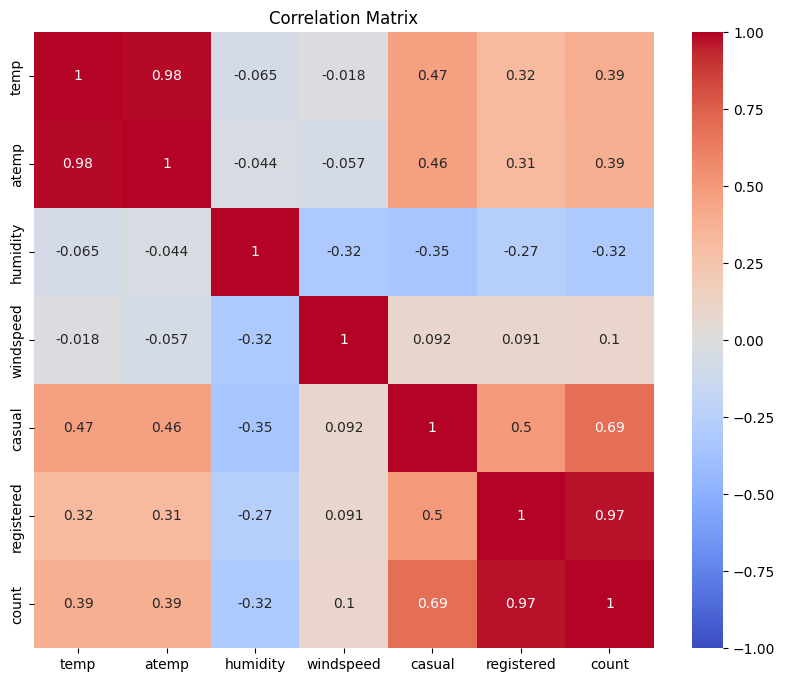

In [101]:
num_cols = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]


# Calculate the correlation matrix
corr_matrix = num_cols.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


### there is a high correlation between registered and count columns and casual and count columns. Therefore, we can drop casual and register column. 

### Also atemp and temp are similarily related to the target variable. Therefore, we can drop one of the columns as well.

In [102]:
df.drop(columns=['casual', 'registered', 'atemp'], axis=1, inplace=True)

In [ ]:
df['temp'].min(), df['temp'].max()

In [ ]:
df['temp'].describe()

## Converting temperature numerical column into bins so that it is converted into categorical column and we can do some analysis. 

In [103]:
df['temp'].min(), df['temp'].max()

(0.82, 41.0)

In [104]:
# Define bin edges and labels
bins = [0, 10, 20, 30, 41]  # Adjust the bin edges as per your need
labels = ['Very Cold', 'Cold', 'Warm', 'Hot']  # Labels for each bin

# Create a new column for the binned temperature
df['temp_bins'] = pd.cut(df['temp'], bins=bins, labels=labels, include_lowest=True)

In [107]:
df['humidity'].min(), df['humidity'].max()

(0, 100)

In [105]:
bins = [0, 33, 66, 100]
labels = ['Low', 'Moderate', 'High']

df['humidity_level'] = pd.cut(df['humidity'], bins=bins, labels=labels, include_lowest=True)


### Bar graph w.r.t total count of different classes

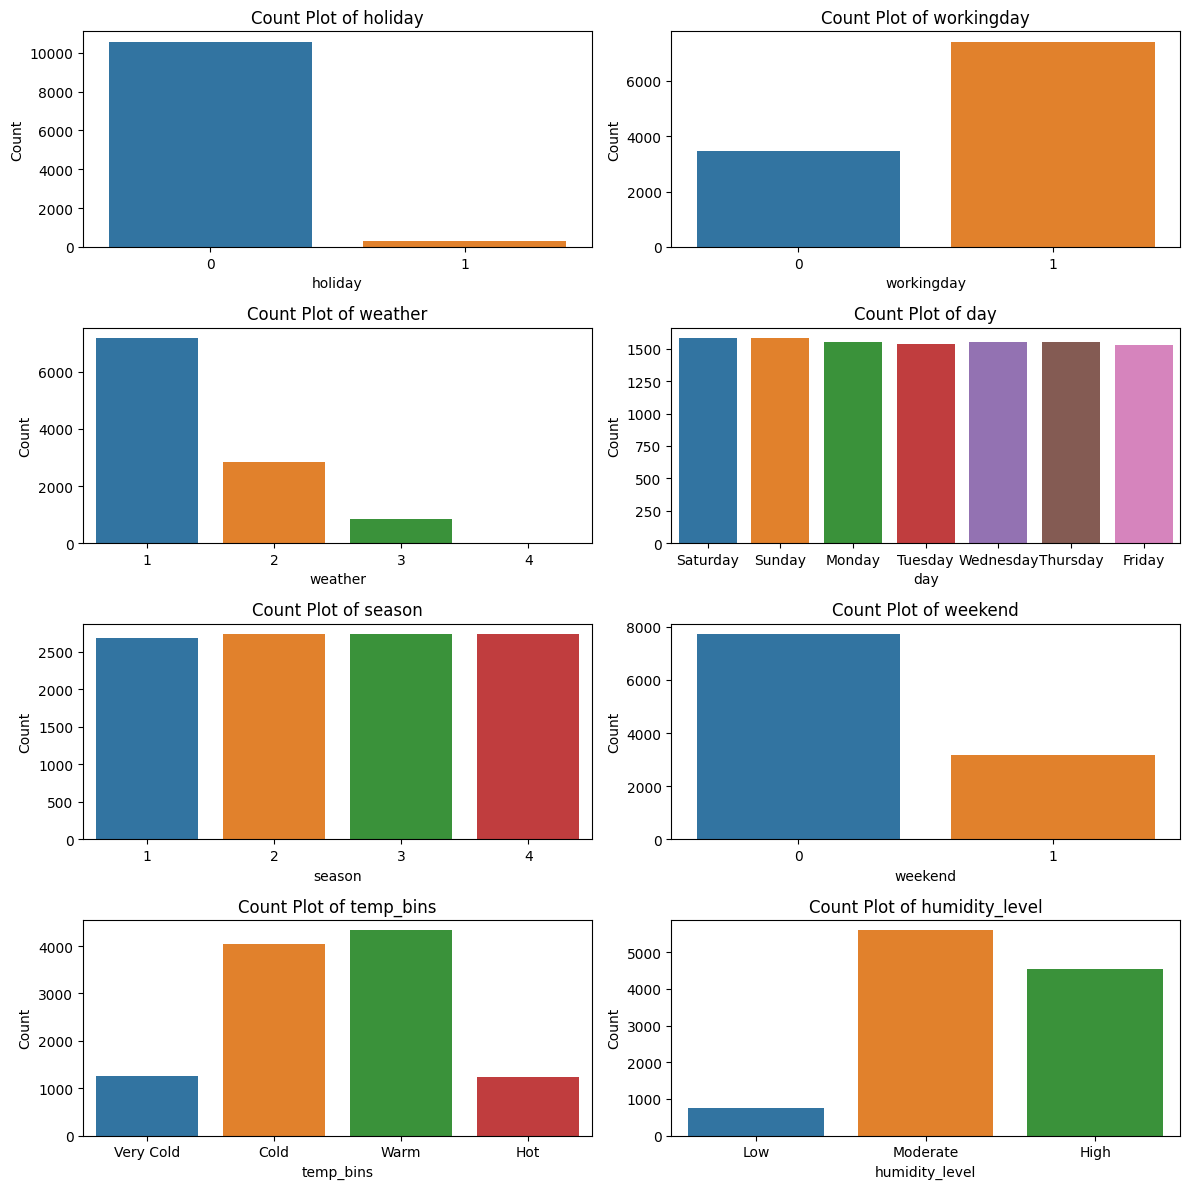

In [106]:
cat_col = ['holiday', 'workingday', 'weather', 'day', 'season', 'weekend', 'temp_bins', 'humidity_level']

plt.figure(figsize=(12, 12))  # Adjust figure size to accommodate all subplots

for i, col in enumerate(cat_col, 1):  # Enumerate to keep track of plot index
    plt.subplot(4, 2, i)  # 4 rows, 2 columns, i is the current plot number
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust layout so subplots do not overlap
plt.show()  # Show all plots at the end


### Bar graph w.r.t mean of different classes

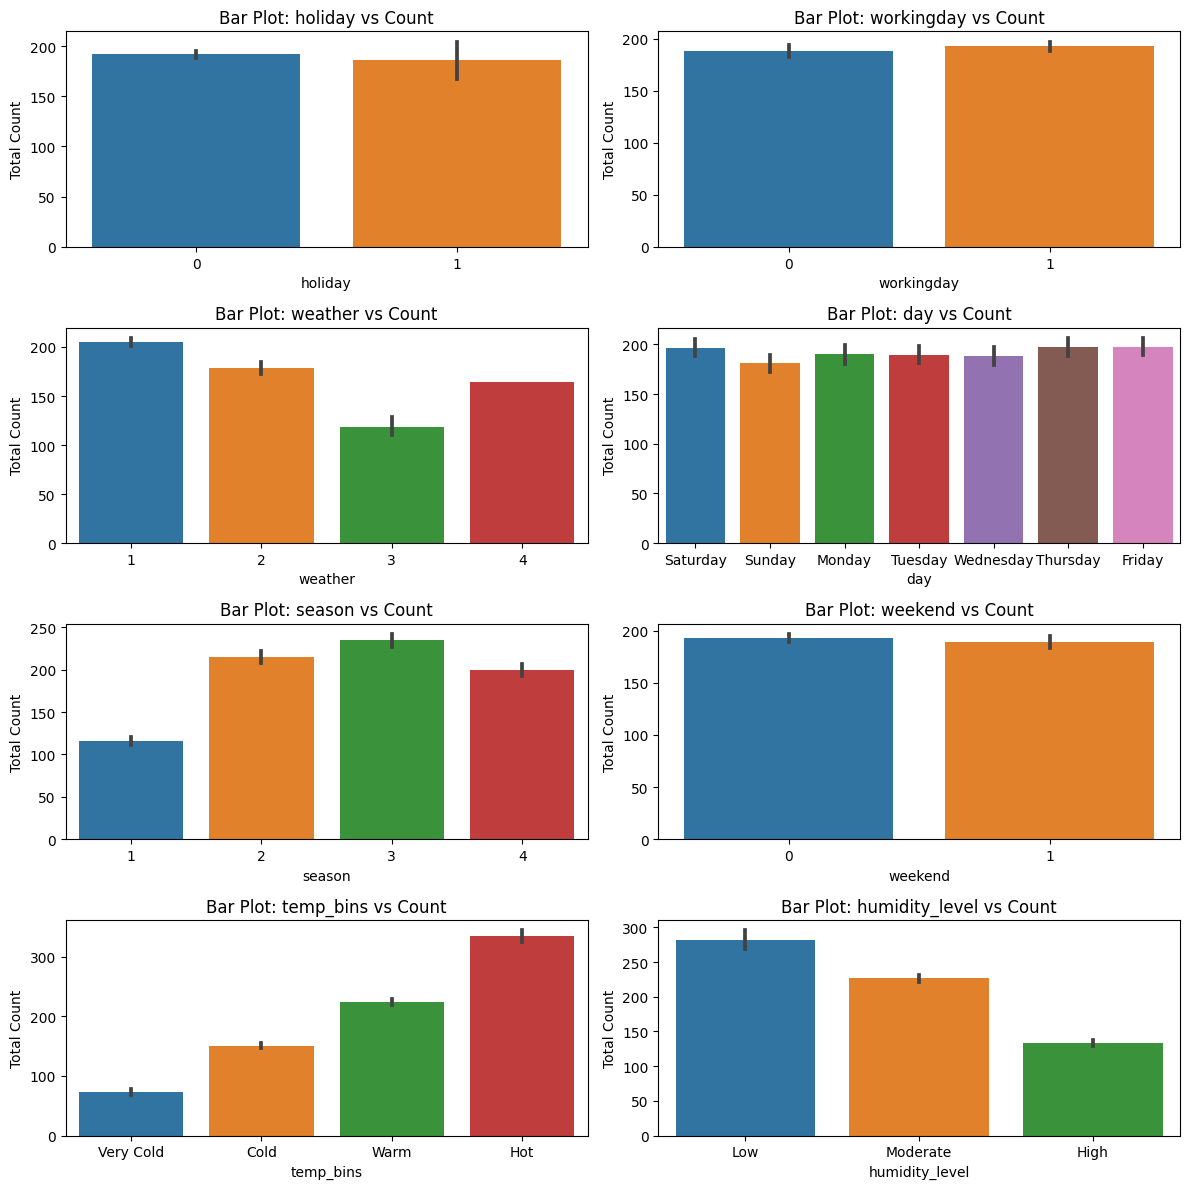

In [108]:
plt.figure(figsize=(12, 12))  # Adjust figure size to accommodate all subplots

# Iterate over the categorical columns
for i, col in enumerate(cat_col, 1):  # Enumerate to get index and column name
    plt.subplot(4, 2, i)  
    sns.barplot(x=col, y='count', data=df, estimator='mean') 
    plt.title(f"Bar Plot: {col} vs Count")
    plt.xlabel(col)
    plt.ylabel('Total Count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show all plots together

In [111]:
cat_col = ['season', 'holiday', 'workingday', 'weather', 'month', 'hour', 'dayofweek', 'day', 'weekend', 'temp_bins', 'humidity_level']

# Create a dictionary to store results
shapiro_results = {}

# Significance level
alpha = 0.05

# Loop through each categorical column
for col in cat_col:
    unique_values = df[col].unique()
    shapiro_results[col] = {}
    
    # Loop through each unique value in the categorical column
    for value in unique_values:
        # Filter data for the current unique value
        subset = df[df[col] == value]['count']
        
        # Check if the subset has at least 3 data points
        if len(subset) < 3:
            shapiro_results[col][value] = {'statistic': None, 'p_value': None, 'result': "Not enough data points for Shapiro-Wilk test (minimum 3 required)."}
            continue
        
        # Perform Shapiro-Wilk test
        stat, p_value = shapiro(subset)
        
        # Determine if the data is normally distributed
        if p_value < alpha:
            result = "Reject null hypothesis. The data distribution of this class is non-normally distributed."
        else:
            result = "Fail to reject null hypothesis. The data distribution of this class is normally distributed."
        
        # Store the results
        shapiro_results[col][value] = {'statistic': stat, 'p_value': p_value, 'result': result}

# Display the Shapiro-Wilk test results
for col, results in shapiro_results.items():
    print(f"\nColumn: {col}")
    for value, result in results.items():
        if result['statistic'] is None:
            print(f"  Unique Value: {value} -> {result['result']}")
        else:
            print(f"  Unique Value: {value} -> Statistic: {result['statistic']:.4f}, p-value: {result['p_value']:.4f}")
            print(f"    {result['result']}")



Column: season
  Unique Value: 1 -> Statistic: 0.8087, p-value: 0.0000
    Reject null hypothesis. The data distribution of this class is non-normally distributed.
  Unique Value: 2 -> Statistic: 0.9005, p-value: 0.0000
    Reject null hypothesis. The data distribution of this class is non-normally distributed.
  Unique Value: 3 -> Statistic: 0.9148, p-value: 0.0000
    Reject null hypothesis. The data distribution of this class is non-normally distributed.
  Unique Value: 4 -> Statistic: 0.8955, p-value: 0.0000
    Reject null hypothesis. The data distribution of this class is non-normally distributed.

Column: holiday
  Unique Value: 0 -> Statistic: 0.8775, p-value: 0.0000
    Reject null hypothesis. The data distribution of this class is non-normally distributed.
  Unique Value: 1 -> Statistic: 0.8933, p-value: 0.0000
    Reject null hypothesis. The data distribution of this class is non-normally distributed.

Column: workingday
  Unique Value: 0 -> Statistic: 0.8852, p-value: 0.00

### Shapiro-Wilk Test Results

| Column           | Unique Value      | Statistic | p-value | Distribution Status                                          |
|------------------|-------------------|-----------|---------|-------------------------------------------------------------|
| **season**       | 1                 | 0.8087    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
|                  | 2                 | 0.9005    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
|                  | 3                 | 0.9148    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
|                  | 4                 | 0.8955    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
| **holiday**      | 0                 | 0.8775    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
|                  | 1                 | 0.8933    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
| **workingday**   | 0                 | 0.8852    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
|                  | 1                 | 0.8703    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
| **weather**      | 1                 | 0.8909    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
|                  | 2                 | 0.8768    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
|                  | 3                 | 0.7674    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
|                  | 4                 | -         | -       | Not enough data points for Shapiro-Wilk test (minimum 3 required). |
| **weekend**      | 1                 | 0.8839    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
|                  | 0                 | 0.8720    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
| **temp_bins**    | Very Cold         | 0.7246    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
|                  | Cold              | 0.8645    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
|                  | Warm              | 0.9026    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
|                  | Hot               | 0.9584    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
| **humidity_level**| High             | 0.8087    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
|                  | Moderate          | 0.9126    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |
|                  | Low               | 0.9470    | 0.0000  | Reject null hypothesis. The data distribution is non-normal. |


In [109]:


# Create a dictionary to store results
test_results = {}

# Significance level
alpha = 0.05

# Loop through each categorical column
for col in cat_col:
    unique_values = df[col].unique()
    test_results[col] = {}
    
    # If the number of unique values is 2, perform t-test
    if len(unique_values) == 2:
        group1 = df[df[col] == unique_values[0]]['count']
        group2 = df[df[col] == unique_values[1]]['count']
        
        # Perform t-test
        stat, p_value = ttest_ind(group1, group2)
        
        # Store the result
        if p_value < alpha:
            result = f"Reject null hypothesis. The means of the two groups in {col} are significantly different."
        else:
            result = f"Fail to reject null hypothesis. The means of the two groups in {col} are not significantly different."
        
        test_results[col] = {'test': 't-test', 'p_value': p_value, 'result': result}
    
    # If the number of unique values is more than 2, perform ANOVA or Kruskal-Wallis test
    elif len(unique_values) > 2:
        groups = [df[df[col] == value]['count'] for value in unique_values]
        
        # Perform ANOVA (for normally distributed data)
        stat, p_value_anova = f_oneway(*groups)
        
        # Perform Kruskal-Wallis test (for non-normally distributed data)
        stat, p_value_kruskal = kruskal(*groups)
        
        # Store the results for both ANOVA and Kruskal-Wallis
        if p_value_anova < alpha:
            anova_result = f"Reject null hypothesis. The means of the groups in {col} are significantly different (ANOVA)."
        else:
            anova_result = f"Fail to reject null hypothesis. The means of the groups in {col} are not significantly different (ANOVA)."
        
        if p_value_kruskal < alpha:
            kruskal_result = f"Reject null hypothesis. The medians of the groups in {col} are significantly different (Kruskal-Wallis)."
        else:
            kruskal_result = f"Fail to reject null hypothesis. The medians of the groups in {col} are not significantly different (Kruskal-Wallis)."
        
        test_results[col] = {'ANOVA': {'p_value': p_value_anova, 'result': anova_result},
                             'Kruskal-Wallis': {'p_value': p_value_kruskal, 'result': kruskal_result}}

# Display the test results
for col, results in test_results.items():
    print(f"\nColumn: {col}")
    if 'test' in results:  # For t-test
        print(f"  Test: {results['test']}, p-value: {results['p_value']:.4f}")
        print(f"  {results['result']}")
        print("*************")  # Add separator
    else:  # For ANOVA and Kruskal-Wallis
        print(f"  ANOVA: p-value: {results['ANOVA']['p_value']:.4f}")
        print(f"    {results['ANOVA']['result']}")
        print(f"  Kruskal-Wallis: p-value: {results['Kruskal-Wallis']['p_value']:.4f}")
        print(f"    {results['Kruskal-Wallis']['result']}")
        print("*************")  # Add separator after both tests



Column: season
  ANOVA: p-value: 0.0000
    Reject null hypothesis. The means of the groups in season are significantly different (ANOVA).
  Kruskal-Wallis: p-value: 0.0000
    Reject null hypothesis. The medians of the groups in season are significantly different (Kruskal-Wallis).
*************

Column: holiday
  Test: t-test, p-value: 0.5737
  Fail to reject null hypothesis. The means of the two groups in holiday are not significantly different.
*************

Column: workingday
  Test: t-test, p-value: 0.2264
  Fail to reject null hypothesis. The means of the two groups in workingday are not significantly different.
*************

Column: weather
  ANOVA: p-value: 0.0000
    Reject null hypothesis. The means of the groups in weather are significantly different (ANOVA).
  Kruskal-Wallis: p-value: 0.0000
    Reject null hypothesis. The medians of the groups in weather are significantly different (Kruskal-Wallis).
*************

Column: month
  ANOVA: p-value: 0.0000
    Reject null h

| Column          | Test            | p-value  | Conclusion                                                                                         |
|-----------------|-----------------|----------|-----------------------------------------------------------------------------------------------------|
| season          | ANOVA           | 0.0000   | Reject null hypothesis. The means of the groups in season are significantly different.               |
| season          | Kruskal-Wallis  | 0.0000   | Reject null hypothesis. The medians of the groups in season are significantly different.             |
| **holiday**     | t-test          | 0.5737   | Fail to reject null hypothesis. The means of the two groups in holiday are not significantly different. |
| **workingday**  | t-test          | 0.2264   | Fail to reject null hypothesis. The means of the two groups in workingday are not significantly different. |
| weather         | ANOVA           | 0.0000   | Reject null hypothesis. The means of the groups in weather are significantly different.              |
| weather         | Kruskal-Wallis  | 0.0000   | Reject null hypothesis. The medians of the groups in weather are significantly different.            |
| month           | ANOVA           | 0.0000   | Reject null hypothesis. The means of the groups in month are significantly different.                |
| month           | Kruskal-Wallis  | 0.0000   | Reject null hypothesis. The medians of the groups in month are significantly different.              |
| hour            | ANOVA           | 0.0000   | Reject null hypothesis. The means of the groups in hour are significantly different.                 |
| hour            | Kruskal-Wallis  | 0.0000   | Reject null hypothesis. The medians of the groups in hour are significantly different.               |
| dayofweek       | ANOVA           | 0.0922   | Fail to reject null hypothesis. The means of the groups in dayofweek are not significantly different. |
| dayofweek       | Kruskal-Wallis  | 0.0055   | Reject null hypothesis. The medians of the groups in dayofweek are significantly different.          |
| day             | ANOVA           | 0.0922   | Fail to reject null hypothesis. The means of the groups in day are not significantly different.       |
| day             | Kruskal-Wallis  | 0.0055   | Reject null hypothesis. The medians of the groups in day are significantly different.                |
| **weekend**     | t-test          | 0.3005   | Fail to reject null hypothesis. The means of the two groups in weekend are not significantly different. |
| temp_bins       | ANOVA           | 0.0000   | Reject null hypothesis. The means of the groups in temp_bins are significantly different.            |
| temp_bins       | Kruskal-Wallis  | 0.0000   | Reject null hypothesis. The medians of the groups in temp_bins are significantly different.          |
| humidity_level  | ANOVA           | 0.0000   | Reject null hypothesis. The means of the groups in humidity_level are significantly different.        |
| humidity_level  | Kruskal-Wallis  | 0.0000   | Reject null hypothesis. The medians of the groups in humidity_level are significantly different.      |


In [112]:
classes_mean = {}

for col in cat_col:
    if len(df[col].unique()) == 2:
        group1 = df[df[col] == 0]['count'].mean()
        group2 = df[df[col] == 1]['count'].mean()

        classes_mean[col] = {0: group1, 1: group2}

    elif len(df[col].unique()) > 2:
        groups = {value: df[df[col] == value]['count'].mean() for value in df[col].unique()}

        classes_mean[col] = {"Groups": groups}

print(classes_mean)


{'season': {'Groups': {1: 116.34326135517499, 2: 215.25137211855105, 3: 234.417124039517, 4: 198.98829553767374}}, 'holiday': {0: 191.7416548463357, 1: 185.87781350482314}, 'workingday': {0: 188.50662061024755, 1: 193.01187263896384}, 'weather': {'Groups': {1: 205.23679087875416, 2: 178.95553987297106, 3: 118.84633294528521, 4: 164.0}}, 'month': {'Groups': {1: 90.36651583710407, 2: 110.0033296337403, 3: 148.16981132075472, 4: 184.16061606160616, 5: 219.4594298245614, 6: 242.03179824561403, 7: 235.32565789473685, 8: 234.1184210526316, 9: 233.8052805280528, 10: 227.6992316136114, 11: 193.67727771679472, 12: 175.6140350877193}}, 'hour': {'Groups': {0: 55.13846153846154, 1: 33.859030837004404, 2: 22.899553571428573, 3: 11.757505773672056, 4: 6.407239819004525, 5: 19.76769911504425, 6: 76.25934065934067, 7: 213.11648351648353, 8: 362.7692307692308, 9: 221.78021978021977, 10: 175.09230769230768, 11: 210.67472527472526, 12: 256.50877192982455, 13: 257.7872807017544, 14: 243.44298245614036, 15

### Summary Table

| Column           | Group           | Value         |
|------------------|------------------|---------------|
| **season**       | 1                | 116.34        |
|                  | 2                | 215.25        |
|                  | 3                | 234.42        |
|                  | 4                | 198.99        |
| **holiday**      | 0                | 191.74        |
|                  | 1                | 185.88        |
| **workingday**   | 0                | 188.51        |
|                  | 1                | 193.01        |
| **weather**      | 1                | 205.24        |
|                  | 2                | 178.96        |
|                  | 3                | 118.85        |
|                  | 4                | 164.00        |
| **month**        | 1                | 90.37         |
|                  | 2                | 110.00        |
|                  | 3                | 148.17        |
|                  | 4                | 184.16        |
|                  | 5                | 219.46        |
|                  | 6                | 242.03        |
|                  | 7                | 235.33        |
|                  | 8                | 234.12        |
|                  | 9                | 233.81        |
|                  | 10               | 227.70        |
|                  | 11               | 193.68        |
|                  | 12               | 175.61        |
| **hour**         | 0                | 55.14         |
|                  | 1                | 33.86         |
|                  | 2                | 22.90         |
|                  | 3                | 11.76         |
|                  | 4                | 6.41          |
|                  | 5                | 19.77         |
|                  | 6                | 76.26         |
|                  | 7                | 213.12        |
|                  | 8                | 362.77        |
|                  | 9                | 221.78        |
|                  | 10               | 175.09        |
|                  | 11               | 210.67        |
|                  | 12               | 256.51        |
|                  | 13               | 257.79        |
|                  | 14               | 243.44        |
|                  | 15               | 254.30        |
|                  | 16               | 316.37        |
|                  | 17               | 468.77        |
|                  | 18               | 430.86        |
|                  | 19               | 315.28        |
|                  | 20               | 228.52        |
|                  | 21               | 173.37        |
|                  | 22               | 133.58        |
|                  | 23               | 89.51         |
| **dayofweek**    | 5                | 196.67        |
|                  | 6                | 180.84        |
|                  | 0                | 190.39        |
|                  | 1                | 189.72        |
|                  | 2                | 188.41        |
|                  | 3                | 197.30        |
|                  | 4                | 197.84        |
| **day**          | Saturday         | 196.67        |
|                  | Sunday           | 180.84        |
|                  | Monday           | 190.39        |
|                  | Tuesday          | 189.72        |
|                  | Wednesday        | 188.41        |
|                  | Thursday         | 197.30        |
|                  | Friday           | 197.84        |
| **weekend**      | 0                | 192.72        |
|                  | 1                | 188.77        |
| **temp_bins**    | Very Cold        | 73.19         |
|                  | Cold             | 150.47        |
|                  | Warm             | 223.41        |
|                  | Hot              | 334.27        |
| **humidity_level**| High            | 133.27        |
|                  | Moderate         | 226.95        |
|                  | Low              | 282.00        |


## Perform Chi square test of independence for all categorical columns

In [123]:
import pandas as pd
from scipy.stats import chi2_contingency

# Replace with the path to your dataset
# df = pd.read_csv('your_dataset.csv')

categorical_columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'day', 'month', 'hour', 'dayofweek', 'day_of_week', 'weekend', 'temp_bins', 'humidity_level']
results = {}

for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        col1 = categorical_columns[i]
        col2 = categorical_columns[j]
        
        # Create a contingency table
        contingency_table = pd.crosstab(df[col1], df[col2])
        
        # Perform Chi-Square test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Determine association
        if p < 0.05:
            association = "Associated"
        else:
            association = "Independent"
        
        results[(col1, col2)] = {'Chi2 Statistic': chi2, 'p-value': p, 'Association': association}

# Print results
for (col1, col2), result in results.items():
    print(f'Chi-Square Test between {col1} and {col2}:')
    print(f"  Chi2 Statistic: {result['Chi2 Statistic']:.4f}")
    print(f"  p-value: {result['p-value']:.4f}")
    print(f"  Association: {result['Association']}")
    print()


Chi-Square Test between season and holiday:
  Chi2 Statistic: 20.8234
  p-value: 0.0001
  Association: Associated

Chi-Square Test between season and workingday:
  Chi2 Statistic: 2.5709
  p-value: 0.4626
  Association: Independent

Chi-Square Test between season and weather:
  Chi2 Statistic: 49.1587
  p-value: 0.0000
  Association: Associated

Chi-Square Test between season and temp:
  Chi2 Statistic: 9914.6621
  p-value: 0.0000
  Association: Associated

Chi-Square Test between season and day:
  Chi2 Statistic: 11.7166
  p-value: 0.8615
  Association: Independent

Chi-Square Test between season and month:
  Chi2 Statistic: 32658.0000
  p-value: 0.0000
  Association: Associated

Chi-Square Test between season and hour:
  Chi2 Statistic: 2.8210
  p-value: 1.0000
  Association: Independent

Chi-Square Test between season and dayofweek:
  Chi2 Statistic: 11.7166
  p-value: 0.8615
  Association: Independent

Chi-Square Test between season and day_of_week:
  Chi2 Statistic: 11.7166
  p-va

| Column 1       | Column 2       | Chi2 Statistic | p-value | Association    |
|----------------|----------------|----------------|---------|----------------|
| season         | holiday        | 20.8234        | 0.0001  | Associated     |
| season         | workingday     | 2.5709         | 0.4626  | Independent    |
| season         | weather        | 49.1587        | 0.0000  | Associated     |
| season         | temp           | 9914.6621      | 0.0000  | Associated     |
| season         | day            | 11.7166        | 0.8615  | Independent    |
| season         | month          | 32658.0000     | 0.0000  | Associated     |
| season         | hour           | 2.8210         | 1.0000  | Independent    |
| season         | dayofweek      | 11.7166        | 0.8615  | Independent    |
| season         | day_of_week    | 11.7166        | 0.8615  | Independent    |
| season         | weekend        | 0.1034         | 0.9914  | Independent    |
| season         | temp_bins      | 8078.8587      | 0.0000  | Associated     |
| season         | humidity_level | 397.9686       | 0.0000  | Associated     |
| holiday        | workingday     | 679.8304       | 0.0000  | Associated     |
| holiday        | weather        | 5.4069         | 0.1443  | Independent    |
| holiday        | temp           | 107.6658       | 0.0000  | Associated     |
| holiday        | day            | 1074.5592      | 0.0000  | Associated     |
| holiday        | month          | 341.2791       | 0.0000  | Associated     |
| holiday        | hour           | 0.0274         | 1.0000  | Independent    |
| holiday        | dayofweek      | 1074.5592      | 0.0000  | Associated     |
| holiday        | day_of_week    | 1074.5592      | 0.0000  | Associated     |
| holiday        | weekend        | 129.6708       | 0.0000  | Associated     |
| holiday        | temp_bins      | 10.3602        | 0.0157  | Associated     |
| holiday        | humidity_level | 12.0027        | 0.0025  | Associated     |
| workingday     | weather        | 16.1625        | 0.0011  | Associated     |
| workingday     | temp           | 195.6435       | 0.0000  | Associated     |
| workingday     | day            | 9632.8348      | 0.0000  | Associated     |
| workingday     | month          | 64.7239        | 0.0000  | Associated     |
| workingday     | hour           | 0.6093         | 1.0000  | Independent    |
| workingday     | dayofweek      | 9632.8348      | 0.0000  | Associated     |
| workingday     | day_of_week    | 9632.8348      | 0.0000  | Associated     |
| workingday     | weekend        | 9507.9174      | 0.0000  | Associated     |
| workingday     | temp_bins      | 23.0068        | 0.0000  | Associated     |
| workingday     | humidity_level | 4.1142         | 0.1278  | Independent    |
| weather        | temp           | 493.8875       | 0.0000  | Associated     |
| weather        | day            | 135.7807       | 0.0000  | Associated     |
| weather        | month          | 247.5604       | 0.0000  | Associated     |
| weather        | hour           | 133.3489       | 0.0000  | Associated     |
| weather        | dayofweek      | 135.7807       | 0.0000  | Associated     |
| weather        | day_of_week    | 135.7807       | 0.0000  | Associated     |
| weather        | weekend        | 12.6685        | 0.0054  | Associated     |
| weather        | temp_bins      | 174.6804       | 0.0000  | Associated     |
| weather        | humidity_level | 1367.0978      | 0.0000  | Associated     |
| temp           | day            | 799.9511       | 0.0000  | Associated     |
| temp           | month          | 16494.1096     | 0.0000  | Associated     |
| temp           | hour           | 2160.4198      | 0.0000  | Associated     |
| temp           | dayofweek      | 799.9511       | 0.0000  | Associated     |
| temp           | day_of_week    | 799.9511       | 0.0000  | Associated     |
| temp           | weekend        | 185.5177       | 0.0000  | Associated     |
| temp           | temp_bins      | 32658.0000     | 0.0000  | Associated     |
| temp           | humidity_level | 1518.0592      | 0.0000  | Associated     |
| day            | month          | 104.8981       | 0.0016  | Associated     |
| day            | hour           | 1.2441         | 1.0000  | Independent    |
| day            | dayofweek      | 65316.0000     | 0.0000  | Associated     |
| day            | day_of_week    | 65316.0000     | 0.0000  | Associated     |
| day            | weekend        | 10886.0000     | 0.0000  | Associated     |
| day            | temp_bins      | 74.7383        | 0.0000  | Associated     |
| day            | humidity_level | 107.5678       | 0.0000  | Associated     |
| month          | hour           | 4.6625         | 1.0000  | Independent    |
| month          | dayofweek      | 104.8981       | 0.0016  | Associated     |
| month          | day_of_week    | 104.8981       | 0.0016  | Associated     |
| month          | weekend        | 18.7955        | 0.0649  | Independent    |
| month          | temp_bins      | 11957.0425     | 0.0000  | Associated     |
| month          | humidity_level | 1169.7303      | 0.0000  | Associated     |
| hour           | dayofweek      | 1.2441         | 1.0000  | Independent    |
| hour           | day_of_week    | 1.2441         | 1.0000  | Independent    |
| hour           | weekend        | 0.6623         | 1.0000  | Independent    |
| hour           | temp_bins      | 980.6551       | 0.0000  | Associated     |
| hour           | humidity_level | 2048.6925      | 0.0000  | Associated     |
| dayofweek      | day_of_week    | 65316.0000     | 0.0000  | Associated     |
| dayofweek      | weekend        | 10886.0000     | 0.0000  | Associated     |
| dayofweek      | temp_bins      | 74.7383        | 0.0000  | Associated     |
| dayofweek      | humidity_level | 107.5678       | 0.0000  | Associated     |
| day_of_week    | weekend        | 10886.0000     | 0.0000  | Associated     |
| day_of_week    | temp_bins      | 74.7383        | 0.0000  | Associated     |
| day_of_week    | humidity_level | 107.5678       | 0.0000  | Associated     |
| weekend        | temp_bins      | 26.4164        | 0.0000  | Associated     |
| weekend        | humidity_level | 2.7362         | 0.2546  | Independent    |
| temp_bins      | humidity_level | 808.3976       | 0.0000  | Associated     |


# Common Observation 

1. 10886 : samples with 11 features and 1 target variable (count) i.e. total count of yulu ride that day. 
2. No duplicates and no null values
3. one datetime data type column, season, holiday, workingday and weather as  categorical data type columns and resting 7 as numerical columns.

**Holiday vs Non-holiday:**

Most data points correspond to non-holidays (represented by 0), with very few data points for holidays (represented by 1). This suggests that the dataset contains mostly workday data.

**Workday vs Non-workday:**

A significant number of entries are marked as workdays (1) compared to non-workdays (0). This indicates that most data is collected during regular workdays.

**Weather Conditions:**

The majority of data points are for weather condition 1 (clear or partly cloudy), followed by condition 2 (misty or cloudy). Very few data points are for condition 3 and 4, which likely represent more extreme weather conditions such as rain or snow.

**Day of the Week:**

The dataset seems to be fairly balanced across the days of the week, with each day having a relatively equal count, indicating data is spread evenly across all days.

**Season:**

The data is equally distributed across all four seasons, suggesting that the dataset spans all seasons of the year.

**Weekend vs Non-weekend:**

Most of the data points are for non-weekend days (0), and there are fewer data points for weekends (1). This aligns with the workday/non-workday distribution, as there are generally fewer weekends.

**Temperature Bins:**

The temperature data is classified into four bins: Very Cold, Cold, Warm, and Hot. Most of the data falls under the Cold and Warm categories, with fewer points in Very Cold and Hot.

**Humidity Levels:**

Most data points fall under moderate humidity levels, followed by high humidity. Low humidity has the least data points, indicating that most data points are from days with moderate or high humidity.

 

## General Tactic to increase the revenue

1. Target Non-Workdays and Weekends:
- Insight: The dataset shows that most transactions or events happen during workdays. However, there is an opportunity to increase business on non-workdays and weekends, which currently have fewer data points.
- Action: Implement special promotions, discounts, or exclusive services during weekends and holidays to attract more customers. For instance, a restaurant or e-commerce platform could offer weekend deals to encourage spending on days where there is less activity.
2. Seasonal Offers:
-Insight: The data is well distributed across all seasons. However, you can capitalize on seasonal trends to boost revenue by understanding the different customer behaviors in each season.
- Action: Create season-specific marketing campaigns. For example, if your business is in retail, offer seasonally themed products or discounts. If it's a travel or hospitality business, offer holiday packages or activities that align with the season.
3. Leverage Weather Conditions:
- Insight: Most data points correspond to clear or mild weather conditions, with fewer points in extreme weather. This suggests that customer activity may drop during adverse weather.
- Action: Implement weather-based promotions. For example, during rainy or extreme weather conditions, offer discounts on home delivery services (for food or retail). Alternatively, if it's a physical store, encourage customers to visit by offering special incentives (e.g., free parking or indoor comfort during harsh weather).
4. Capitalize on High-Temperature Days:
- Insight: The data shows a majority of activity happening during colder or moderate temperatures, with fewer transactions in "Very Cold" or "Hot" conditions.
- Action: On very hot days, focus on selling refreshing products, cooling services, or items suited for heat (e.g., cold beverages, air conditioning products). Alternatively, offer comfort-related promotions for indoor activities (e.g., spa days, movie theater discounts) to drive revenue.
5. Humidity-based Strategies:
- Insight: High and moderate humidity levels dominate. Customers might behave differently based on humidity levels, especially in industries like hospitality or retail.
- Action: Develop special humidity-related deals. For example, high humidity might reduce outdoor activities, so indoor businesses like gyms, entertainment centers, or shopping malls could benefit from running targeted campaigns during high-humidity periods.
6. Optimize for Peak Days (Monday to Friday):
- Insight: The data is fairly evenly distributed across days, with most activity occurring from Monday to Friday.
- Action: Since weekdays already have high activity, consider offering higher-value products or upsells on these days to increase average spend. For example, if you operate a café or restaurant, promote higher-margin items or bundle deals during weekdays.
7. Holiday and Event Campaigns:
- Insight: Since holidays represent a small proportion of the data, it suggests either low customer engagement or reduced business activity on holidays.
- Action: Plan for holiday-themed promotions or exclusive holiday experiences to boost engagement and revenue on holidays. Create urgency around limited-time offers tied to holidays to drive sales or participation.
8. Temperature & Humidity-based Inventory Planning:
- Insight: Most data points correspond to moderate temperatures and humidity levels.
- Action: Use these insights for efficient inventory management. Ensure that products or services most suited for moderate weather and humidity are well-stocked. For example, if you're in fashion retail, stock up on clothing suitable for mild conditions. For hospitality, plan events and menus that align with the expected weather conditions.


# Summary 


1. Personalized Offers: Use the weather, season, and day-of-week insights to create personalized offers for customers based on their behaviors and preferences during different conditions.

2. Collaborate with Delivery Services: On days with extreme weather, collaborate with delivery services (for food, groceries, or products) to drive sales even when foot traffic may be low.
